In [2]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.shape

(1599, 12)

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

C:\Users\Nidhi Kochar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


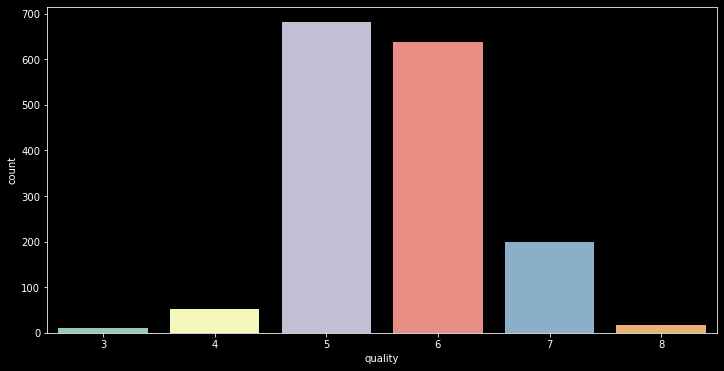

In [8]:
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

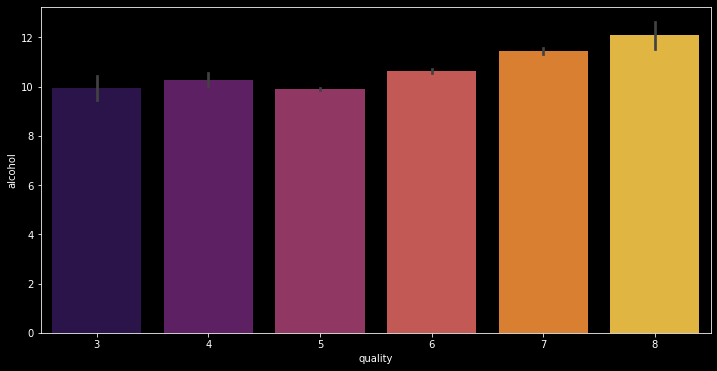

In [9]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

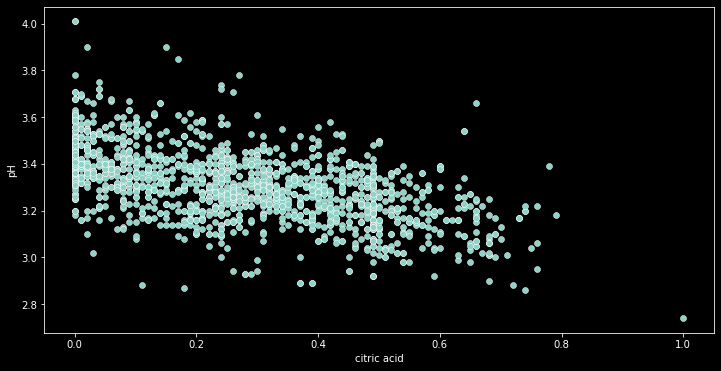

In [10]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

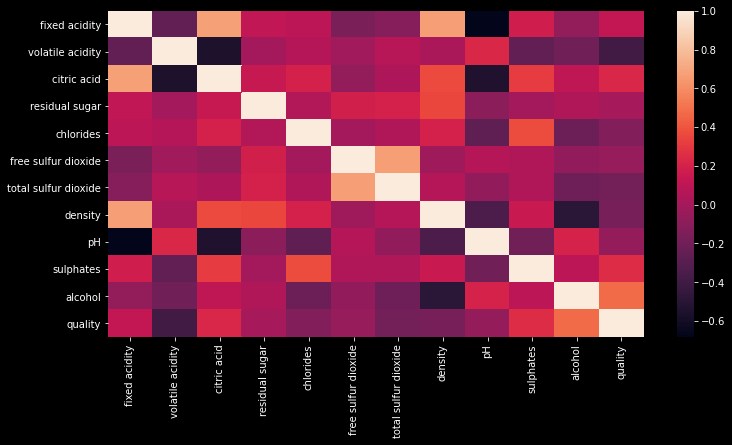

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [13]:
x=df.drop(['quality'], axis=1)
y=df['quality']

# Data Preprocessing

In [14]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res,y_res=os.fit_resample(x, y)

C:\Users\Nidhi Kochar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


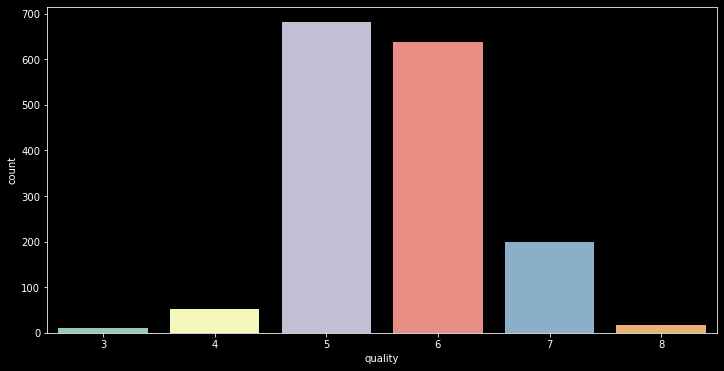

In [39]:
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [18]:
from sklearn.metrics import accuracy_score

# Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test_std,y_test)))

lr_score=lr.score(x_test_std,y_test)

test accuracy 0.6014669926650367


In [20]:
# Here we use confusion matrix to evaluate the logistic regression algorithm
from sklearn.metrics import confusion_matrix
y_prediction = lr.predict(x_test_std)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

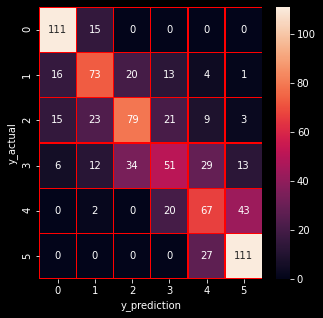

In [21]:
# Heatmap visualization of confusion matrix of Logistic regression model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# KNN

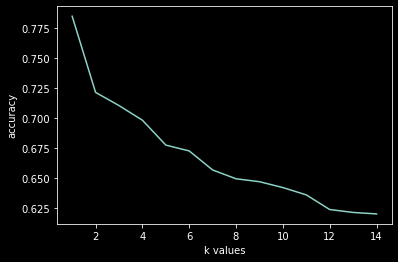

In [22]:
from sklearn.neighbors import KNeighborsClassifier
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [23]:
k =2

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)

 2 nn score: 0.7212713936430318


In [24]:
from sklearn.metrics import confusion_matrix
y_prediction = knn.predict(x_test_std)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

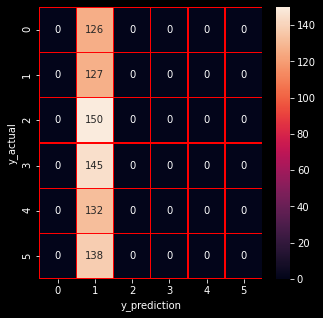

In [25]:
# Heatmap visualization of confusion matrix of the KNN Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Decision Tree 

In [26]:
# Build Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std,y_train)

print("score: ", dt.score(x_test_std,y_test))

dt_score=dt.score(x_test_std,y_test)

score:  0.7897310513447433


In [27]:
# Here we use confusion matrix to evaluate the Decision Tree Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test_std)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

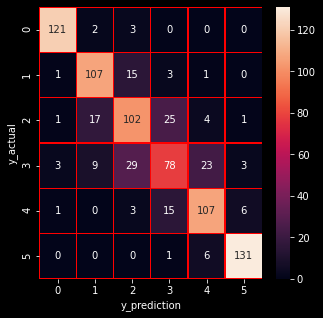

In [28]:
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train_std,y_train)
print("random forest algo result: ",rf.score(x_test_std,y_test))
rf_score = rf.score(x_test_std,y_test)

random forest algo result:  0.8508557457212714


In [30]:
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

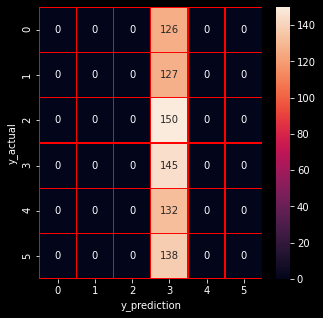

In [31]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# SVM

In [32]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_std,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test_std,y_test))

svm_score = svm.score(x_test_std,y_test)

print accuracy of svm algo:  0.7726161369193154


In [33]:
from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(x_test_std)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

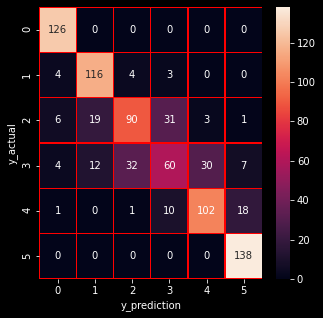

In [34]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

# Naive Bayes

In [35]:
# Build Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_std,y_train)
 
print("Accuracy of naive bayes algo: ",nb.score(x_test_std,y_test))

nb_score = nb.score(x_test_std,y_test)

Accuracy of naive bayes algo:  0.5122249388753056


In [36]:
# Here we use confusion matrix to evaluate the Naive Bayes Model
from sklearn.metrics import confusion_matrix
y_prediction = nb.predict(x_test_std)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

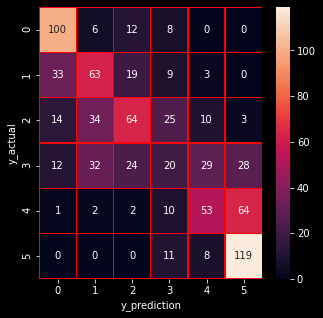

In [37]:
# Heatmap visualization of cunfusion matrix of the Naive Bayes Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

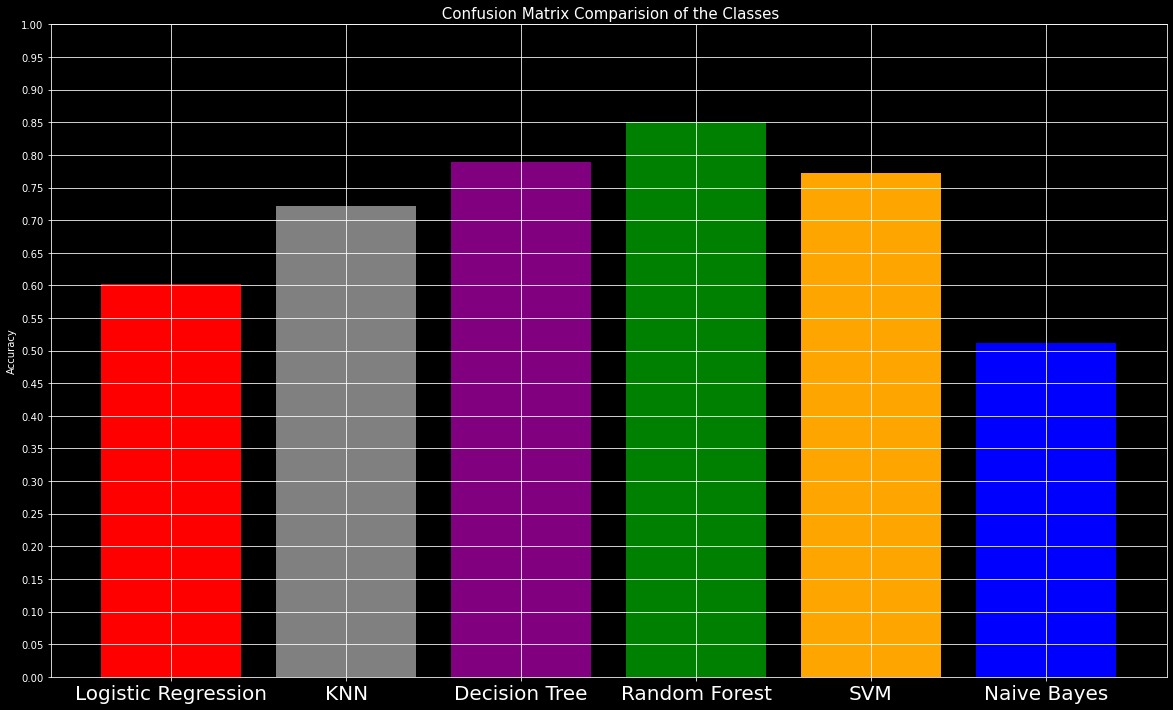

In [38]:
class_name = ("Logistic Regression","KNN","Decision Tree","Random Forest","SVM","Naive Bayes")
class_score = (lr_score,knn_score,dt_score,rf_score,svm_score,nb_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(20,12))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.grid()
plt.title(" Confusion Matrix Comparision of the Classes",fontsize=15)
plt.savefig('graph.png')
plt.show()